# 3.8 Linear Models: Initial-Value Problems

## 範例 1 彈簧質量系統：Free Undamped Motion

一彈簧初始時吊掛於天花板而無懸掛質量。當懸掛一個 2 kg 的重物時，彈簧伸長 9.81 cm。若重物位於平衡點以上 2/3 m 時施予 5 m/s 的向下速度。

問題：

1. 寫出運動方程式。
2. 求出振盪的振幅與頻率。
3. 在何時物體初次通過平衡點？
4. 在何時物體初次剛好低於平衡點 1/2 m?

## 解答

### 求出彈簧係數

<img src="fig_3_8_1.png" alt="img" width="300">

由 Hooke's law 知：

$$
mg - ks = 0
$$

其中 $m\, (\mathrm{kg})$ 為物體質量，$k\,(\mathrm{N/m})$ 為彈簧係數，$s\,(\mathrm{m})$ 為位移量，$g = 9.81\,(\mathrm{m/s^2})$ 為重力加速度。故得

$$
k = \frac{mg}{s}
$$

In [1]:
%display latex

m = 2        # 質量
s = 0.0981   # 初始伸長量
g = 9.81     # 重力加速度    
k = m*g/s    # 彈簧係數
print(f"Spring constant k = {k:.3f}.")

Spring constant k = 200.000.


### 運動方程式

<img src="fig_3_8_2.png" alt="img" width="180">

如上圖，定義自平衡點以下之位移 $x$ 為正。對於無阻尼之自由振動 (free undamped motion)，其運動方程式為

$$
x'' + \omega^2 x = 0
$$

其中 $\omega^2 = k/m$ 為振盪之角頻率 (angular frequency)。頻率 $f$ 與週期 $T$ 則為

$$
f = \frac{1}{T} = \frac{\omega}{2\pi}
$$

#### 求出頻率與角頻率

In [2]:
k = Integer(k)      # 將 k 值轉為整數
omega = sqrt(k/m)
f = omega/(2*pi)
print("Angular frequency omega =", omega)
print("Frequency f = ", f)

Angular frequency omega = 10
Frequency f =  5/pi


#### 建立運動方程式

In [3]:
t = var('t')
x = function('x')(t)
de1 = diff(x,t,t) + omega^2 * x == 0
de1

100*x(t) + diff(x(t), t, t) == 0

### 運動方程式求解

#### 通解

In [4]:
sol1_general = desolve(de1, x)
sol1_general

_K2*cos(10*t) + _K1*sin(10*t)

#### IVP 之解

In [5]:
#                              ICs
#                           ~~~~~~~~
sol1_IVP = desolve(de1, x, [0,-2/3,5])
sol1_IVP

-2/3*cos(10*t) + 1/2*sin(10*t)

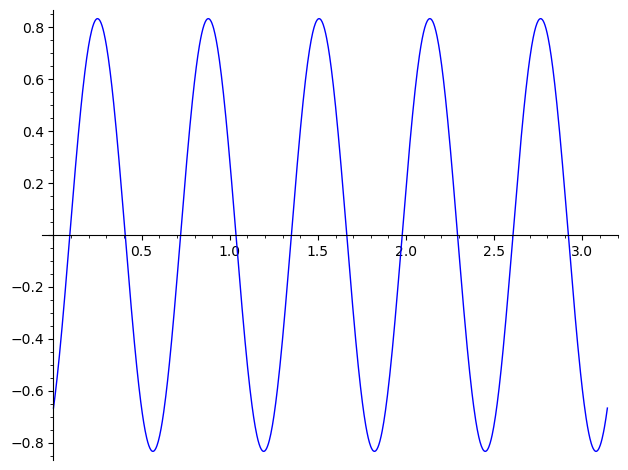

In [6]:
plot(sol1_IVP, t, 0, pi)

#### 求解振幅

此解可表為
$$
x(t) = C_1 \cos(\omega t) + C_2 \sin(\omega t) = A \sin(\omega t + \phi)
$$

其中振幅 $A = \sqrt{C_1^2+C_2^2}$，相位角 $\phi = \tan^{-1}(C_1/C_2)$。

振幅 $A$:

In [7]:
C1 = -2/3; C2 = 1/2
A = sqrt(C1^2+C2^2)
A

5/6

相位角 $\phi$:

In [8]:
phi = atan(C1/C2)
phi

-arctan(4/3)

In [9]:
# phi 之數值：
n(phi)

-0.927295218001612

此形式的解為：

In [10]:
sol2 = A*sin(10*t + phi)
sol2

5/6*sin(10*t - arctan(4/3))

繪圖比較：

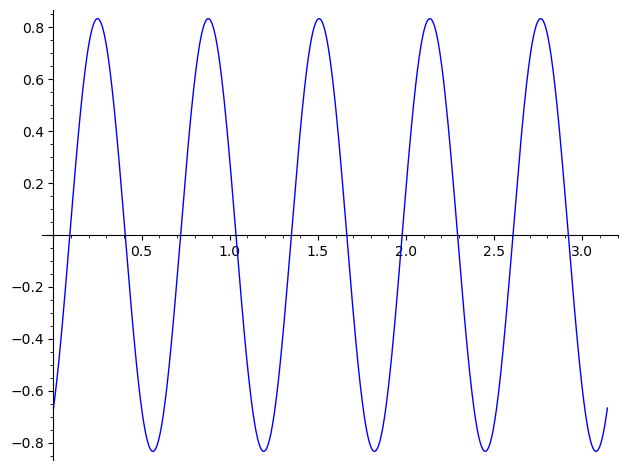

In [11]:
plot(sol2, t, 0, pi)

#### 初次通過平衡點的時間

平衡點為 $x(t) = 0$，故求解下式的 $t$ 值：

$$
A\sin(\omega t + \phi) = 0
$$

In [12]:
solve(sol2 == 0, t)

[t == 1/10*arctan(4/3)]

此解的形式為串列 (list)。如欲取得其值，需取出串列中元素的右手邊：

In [14]:
#                  第一個元素 右手邊
#                       ~~~ ~~~~~
t0 = solve(sol2 == 0, t)[0].rhs()
t0

1/10*arctan(4/3)

故可得初次通過平衡點的時間為 (s):

In [15]:
n(t0)

0.0927295218001612

#### 初次達平衡點下 1/2 m 之時間

需解出：

$$
A\sin(\omega t + \phi) = 1/2
$$

In [16]:
t1 = solve(sol2 == 1/2, t)[0].rhs()
t1

1/10*arcsin(3/5) + 1/10*arctan(4/3)

故得初次達平衡點下 1/2 m 之時間 (s) 為：

In [17]:
n(t1)

0.157079632679490

換言之，$x(0.0927\dots) = 0$, $x(0.157\dots) = 1/2$。